# IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#import dataset


In [ ]:
dataset=pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

# SVR model

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predictions

In [ ]:
y_pred = regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1)
y_pred

array([[-0.27861589]])

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))
y_pred

array([[170370.0204065]])

# Plot the curve

Text(0, 0.5, 'Salary')

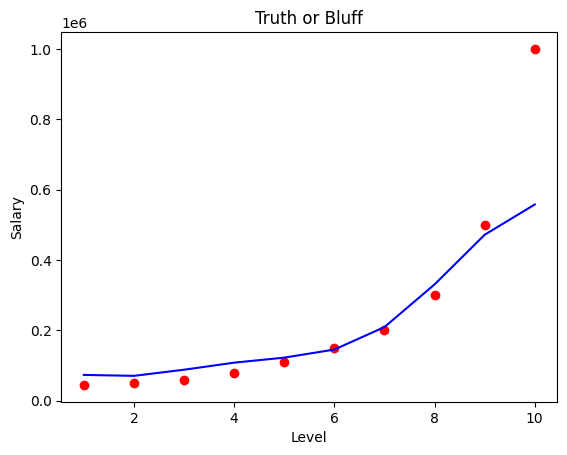

In [ ]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), c="r")
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform([regressor.predict(X)]).reshape(10,1),c="b")
plt.title("Truth or Bluff")
plt.xlabel("Level")
plt.ylabel("Salary")